# imports and loading data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Data preprocesssing

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.shape

(150, 5)

In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [11]:
df[df.target==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [12]:
df[df.target==0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [13]:
df[df.target==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


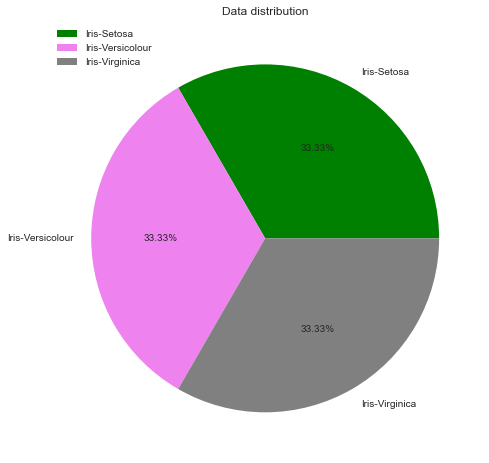

In [56]:
plt.figure(figsize=(8,8))
plt.pie(df.target.value_counts(),labels=['Iris-Setosa','Iris-Versicolour','Iris-Virginica'],autopct='%.2f%%',colors=['green',
                                                                    'violet','gray'])
plt.title('Data distribution')
plt.legend(['Iris-Setosa','Iris-Versicolour','Iris-Virginica'],loc='best')
plt.show()

the conclusion is data is distributed equaly

In [15]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

# Data visualisation

sepal length and sepal width

Text(0, 0.5, 'sepal width(cm)')

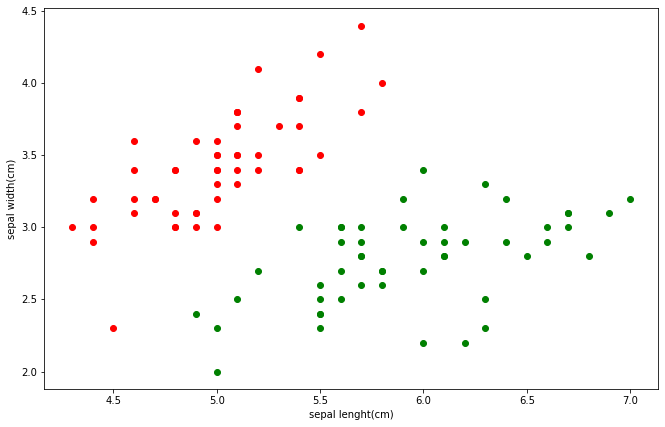

In [16]:
plt.figure(figsize=(11,7))
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.xlabel('sepal lenght(cm)')
plt.ylabel('sepal width(cm)')

petal lenght and petal width

Text(0, 0.5, 'petal width')

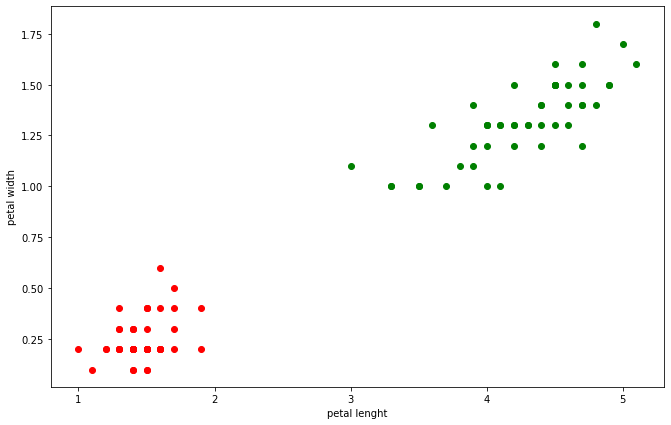

In [17]:
plt.figure(figsize=(11,7))
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.xlabel('petal lenght')
plt.ylabel('petal width')

# Train-test splitting

In [18]:
x=df.drop('target',axis=1)
y=df.target

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


# K nearest neigbhour classifier

for comaparing n_neighbors and score

In [20]:
score_dict={'n_neighbors':[],'score':[]}
for i in range(3,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    score_dict['n_neighbors'].append(i)
    score_dict['score'].append(score)
kscore=pd.DataFrame(score_dict)
kscore

,n_neighbors,score
0,3,0.921053
1,4,0.921053
2,5,0.947368
3,6,0.947368
4,7,0.973684
5,8,0.947368
6,9,0.973684
7,10,0.973684
8,11,0.973684
9,12,0.973684


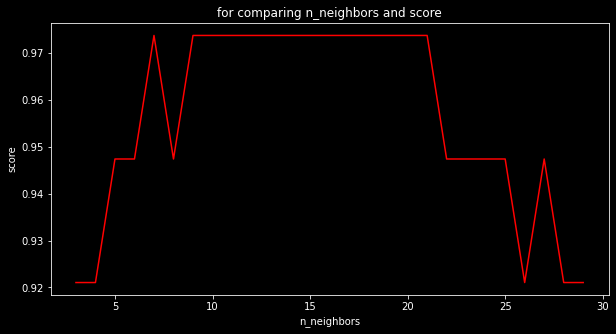

In [36]:
plt.figure(figsize=(10,5))
plt.style.use('dark_background')
plt.plot(range(3,30),score_dict['score'],color='red')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.title('for comparing n_neighbors and score')
plt.show()

In [22]:
knn=KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.score(x_test,y_test)

0.9736842105263158

In [25]:
knn.predict([[6,3,4,5]])

array([2])

# confusion matrix,classification report and accuracy score

In [26]:
y_pred=knn.predict(x_test)

In [27]:
cm=confusion_matrix(y_test,y_pred)

Text(52.0, 0.5, 'predicted')

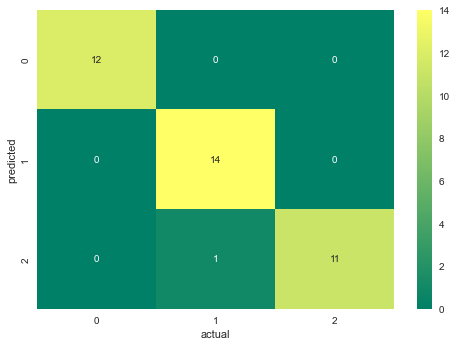

In [38]:
sns.heatmap(cm,annot=True,cmap='summer')
plt.style.use('seaborn')

plt.xlabel('actual')
plt.ylabel('predicted')

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [30]:
print(accuracy_score(y_test,y_pred))

0.9736842105263158


# Support vector machine

In [31]:
from sklearn.svm import SVC

In [32]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9736842105263158

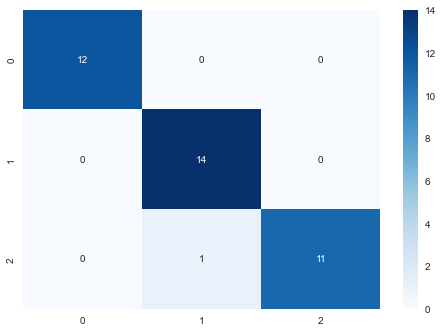

In [39]:
y_pred=svm.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.style.use('seaborn')

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
svm.predict([[6,3,4,5]])

array([2])